In [ ]:
import math
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1

In [ ]:
data = datasets.load_iris()
X, y = data.data, data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

In [ ]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNNClassificationEuclidian:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_class = [self.y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_class).most_common(1)
    return most_common[0][0]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

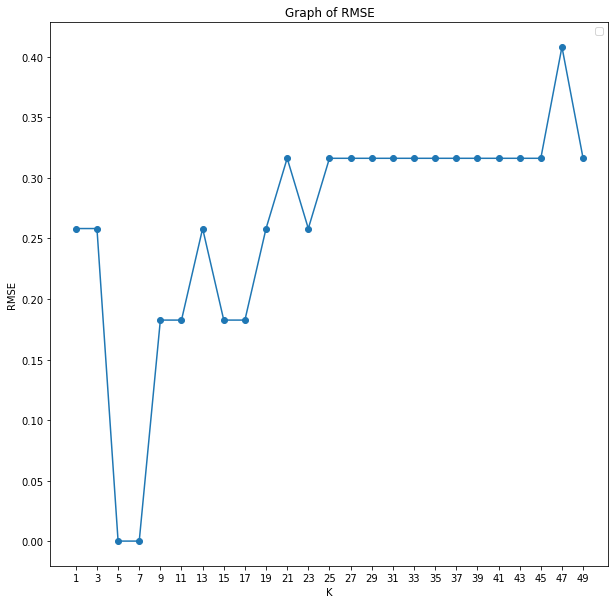

In [ ]:
rmse_values = []
k_num = []
for k in range(1, 50, 2):
  model = KNNClassificationEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 2.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Ditemukan bahwa untuk Iris dataset, value k yang paling optimal jika dilihat melalui elbow curve (di mana angka lebih rendah menunjukkan error yang lebih rendah melalui root mean squared error), adalah 5 dan 7, yang memiliki RMSE sebesar 0. Maka, saya akan memilih k = 7.

In [ ]:
model = KNNClassificationEuclidian(7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.0
0.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



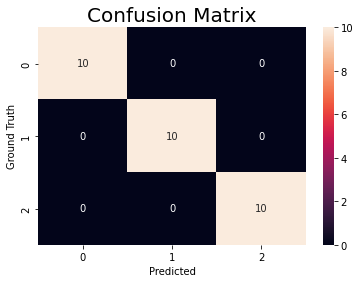

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# 2

## Manhattan Distance

In [ ]:
def manhattan(x1, x2):
  return np.sum(np.absolute(x1 - x2))

In [ ]:
class KNNClassificationManhattan:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [manhattan(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_class = [self.y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_class).most_common(1)
    return most_common[0][0]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

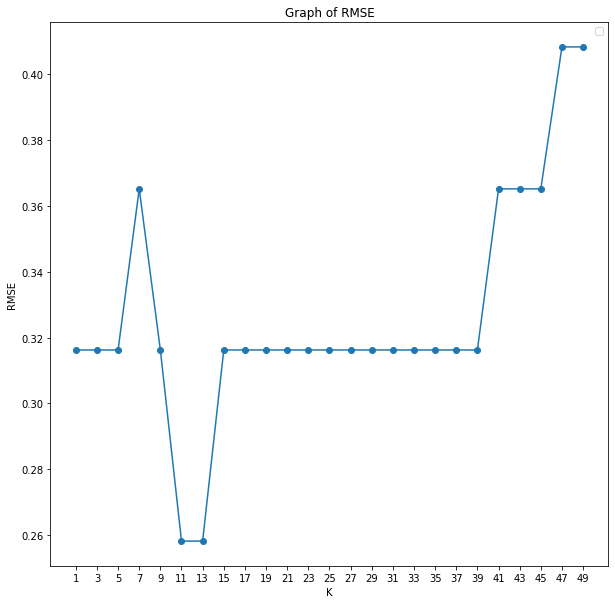

In [ ]:
rmse_values_manhattan = []
k_num_manhattan = []
for k in range(1, 50, 2):
  model = KNNClassificationManhattan(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num_manhattan.append(k)
  rmse_values_manhattan.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num_manhattan, rmse_values_manhattan, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 2.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Terlihat dari elbow curve untuk KNN dengan manhattan distance bahwa RMSE tidak dapat mencapai 0, di mana RMSE terendah didapatkan ketika k = 11 atau k = 13. Setelah kedua values tersebut, grafik terus meningkat, yang menunjukkan bahwa di atas k = 13, tingkat error akan terus menaik. Maka, saya akan memilih k = 13.

In [ ]:
model_manhattan = KNNClassificationManhattan(13)
model_manhattan.fit(X_train, y_train)
y_pred_manhattan = model_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(accuracy_manhattan)
print(np.sqrt(mean_squared_error(y_test, y_pred_manhattan)))

0.9333333333333333
0.2581988897471611


In [ ]:
print(classification_report(y_test, y_pred_manhattan))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



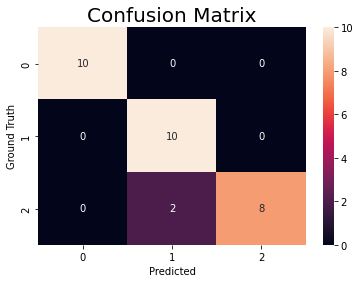

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_manhattan), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## Minkowski Distance

In [ ]:
def minkowski(x1, x2, p):
  return np.power(np.sum(np.absolute((x1 - x2)) ** p), 1 / p)

In [ ]:
class KNNClassificationMinkowski:
  def __init__(self, k, p):
    self.k = k
    self.p = p
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [minkowski(x_test, x_train, self.p) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_class = [self.y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_class).most_common(1)
    return most_common[0][0]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

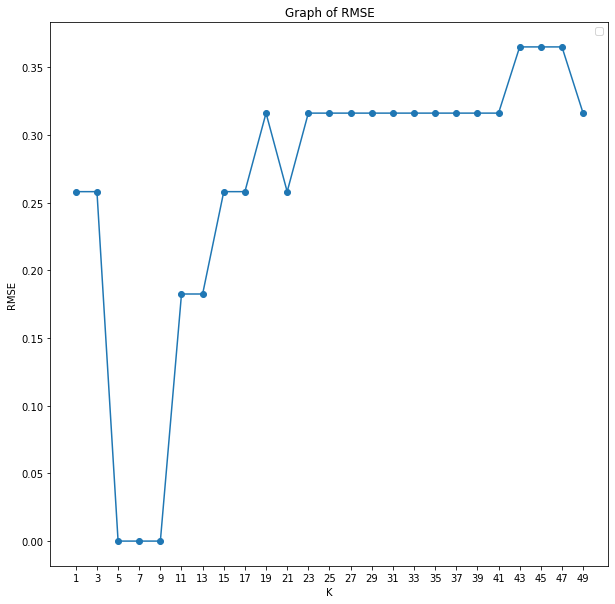

In [ ]:
rmse_values_minkowski = []
k_num_minkowski = []
for k in range(1, 50, 2):
  model = KNNClassificationMinkowski(k, 4)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num_minkowski.append(k)
  rmse_values_minkowski.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num_minkowski, rmse_values_minkowski, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 2.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Minkowski distance merupakan generalisasi dari euclidean dan manhattan distance, di mana ketika p = 1, jarak sama dengan manhattan, dan ketika p = 2, jarak sama dengan euclidean. Maka, saya mencoba menggunakan p = 4, dan mendapatkan bahwa akurasi yang didapatkan hampir sama dengan ketika menggunakan euclidean distance, yaitu bahwa dari elbow curve, terlihat bahwa terdapat k paling optimal ketika k = 5, k = 7, atau k = 9. Maka, saya akan menggunakan k = 7.

In [ ]:
model_minkowski = KNNClassificationMinkowski(7, 4)
model_minkowski.fit(X_train, y_train)
y_pred_minkowski = model_minkowski.predict(X_test)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)
print(accuracy_minkowski)
print(np.sqrt(mean_squared_error(y_test, y_pred_minkowski)))

1.0
0.0


In [ ]:
print(classification_report(y_test, y_pred_minkowski))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



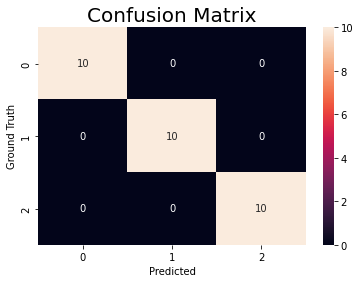

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_minkowski), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## Hamming Distance

In [ ]:
def hamming(x1, x2):
  return sum(f1 != f2 for f1, f2 in zip(x1, x2))

In [ ]:
class KNNClassificationHamming:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [hamming(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_class = [self.y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_class).most_common(1)
    return most_common[0][0]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

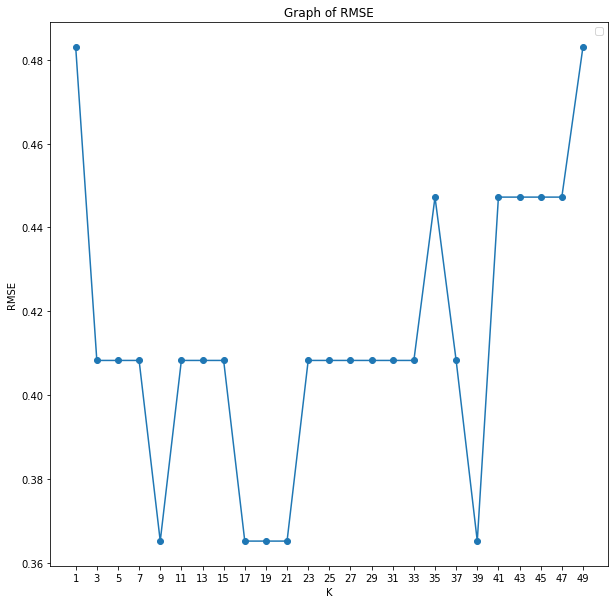

In [ ]:
rmse_values_hamming = []
k_num_hamming = []
for k in range(1, 50, 2):
  model = KNNClassificationHamming(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num_hamming.append(k)
  rmse_values_hamming.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num_hamming, rmse_values_hamming, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 2.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Terlihat bahwa ketika menggunakan hamming distance yang hanya membandingkan equality dari pairs of features dari training dan testing set, terlihat bahwa tingkat error yang didapatkan melalui metric RMSE tidak pernah mencapai 0. Dari elbow curve, terlihat bahwa titik minimum RMSE dicapai ketika k = 9, 17, 19, 21, dan 39. Maka, saya akan memilih k = 9.

In [ ]:
model_hamming = KNNClassificationHamming(9)
model_hamming.fit(X_train, y_train)
y_pred_hamming = model_hamming.predict(X_test)
accuracy_hamming = accuracy_score(y_test, y_pred_hamming)
print(accuracy_hamming)
print(np.sqrt(mean_squared_error(y_test, y_pred_hamming)))

0.8666666666666667
0.3651483716701107


In [ ]:
print(classification_report(y_test, y_pred_hamming))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.75      0.90      0.82        10
           2       1.00      0.70      0.82        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30



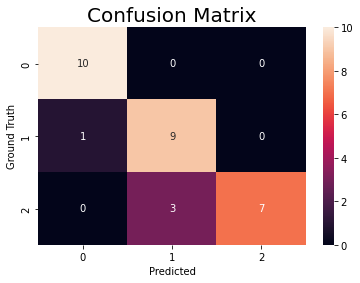

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_hamming), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# 3

Menggunakan Boston House Prices Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mike-ds30/quiz/main/housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


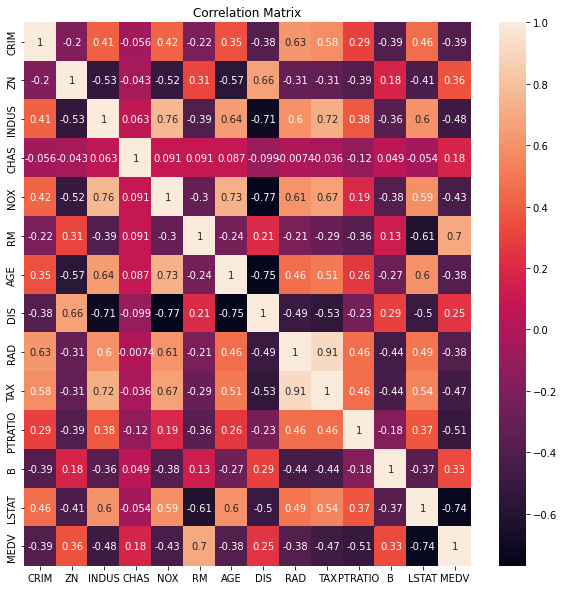

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = data.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data = data.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B'], axis = 1)

In [ ]:
X = data.drop('MEDV', axis = 1)
y = data['MEDV']
X_final = X.values
y_final = y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state = 100)

In [ ]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNNRegressionEuclidian:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_values = [self.y_train[i] for i in k_nearest]
    average = np.average(k_nearest_values)
    return average

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

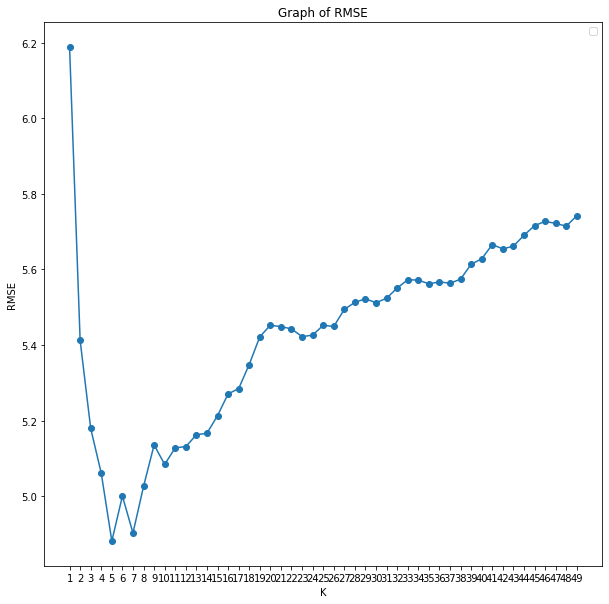

In [ ]:
rmse_values = []
k_num = []
for k in range(1, 50):
  model = KNNRegressionEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 1.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Di dalam menggunakan KNN untuk regresi, terlihat bahwa elbow curve menunjukkan Root Mean Squared Error dari setiap training dan predicting untuk nilai k berbeda. Terlihat bahwa elbow curve ini mencapai minimum pada saat k = 5, di mana k = 5 menghasilkan RMSE yang paling rendah, yang menunjukkan bahwa k = 5 merupakan nilai k yang paling optimal untuk digunakan untuk regresi untuk dataset ini. Maka, saya akan menggunakan k = 5.

In [ ]:
model = KNNRegressionEuclidian(5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(60)

,Predicted,Ground Truth
0,38.90,34.6
1,41.06,31.5
2,27.30,20.6
3,19.80,14.5
4,20.40,16.2
5,22.12,22.3
6,21.02,22.8
7,20.68,24.4
8,19.50,19.8
9,18.30,16.7


In [ ]:
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

23.83090196078431
4.881690481870426
0.7532888116242497


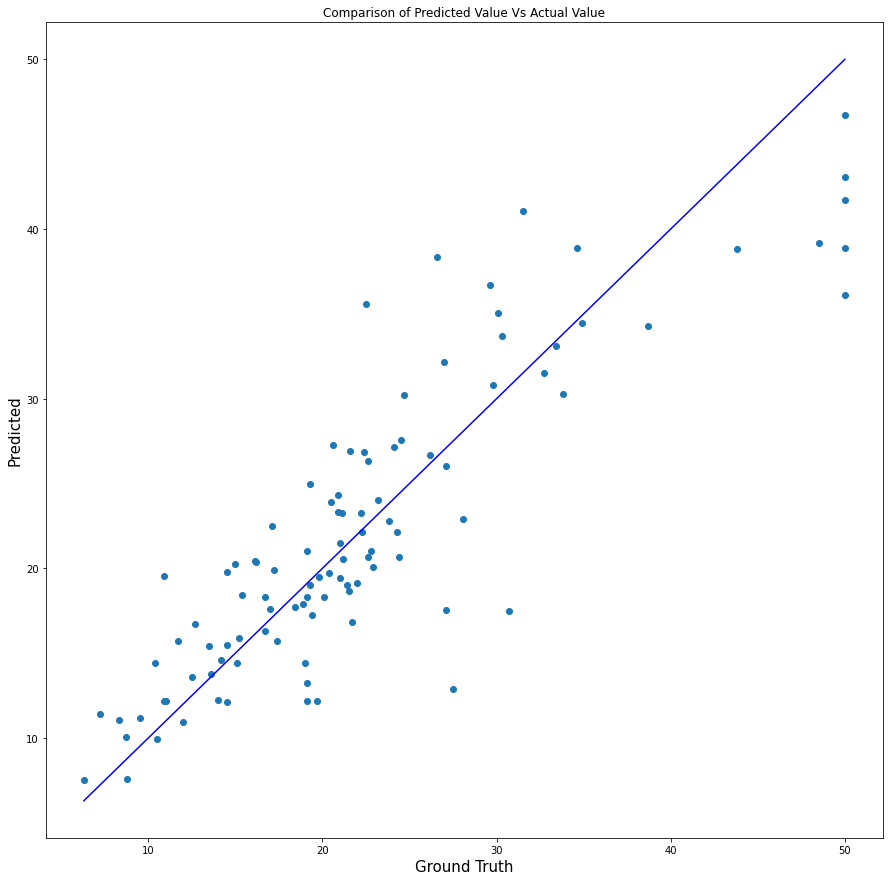

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred)
p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparison of Predicted Value Vs Actual Value")
plt.xlabel('Ground Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()

# 4

## Mencoba menggunakan standardization

In [ ]:
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y_final, test_size = 0.2, random_state = 100)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

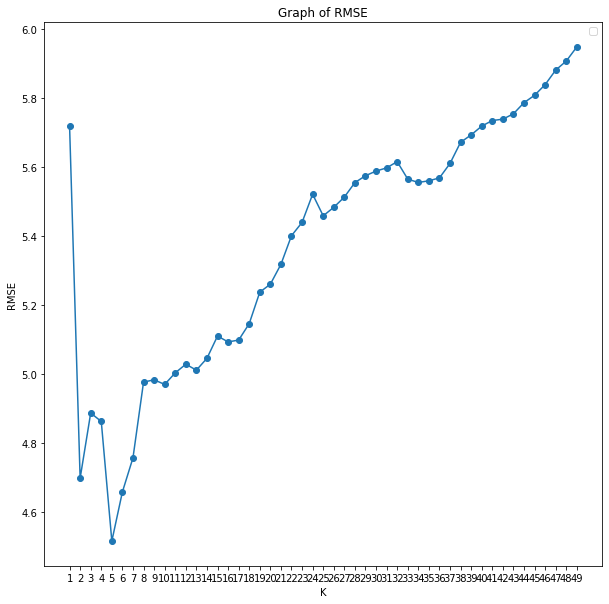

In [ ]:
rmse_values = []
k_num = []
for k in range(1, 50):
  model = KNNRegressionEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 1.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Terlihat bahwa ketika standardisasi data digunakan dalam data preparation, hal ini menghasilkan elbow curve yang mencapai mininum yang lebih rendah. Terlihat bahwa elbow curve ini mencapai minimum pada saat k = 2, di mana k = 2 menghasilkan RMSE yang paling rendah, yang menunjukkan bahwa k = 2 merupakan nilai k yang paling optimal untuk digunakan untuk regresi untuk dataset ini. Maka, saya akan menggunakan k = 2.

In [ ]:
model = KNNRegressionEuclidian(2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(60)

,Predicted,Ground Truth
0,36.60,34.6
1,47.50,31.5
2,23.70,20.6
3,20.05,14.5
4,19.70,16.2
5,23.25,22.3
6,18.85,22.8
7,19.15,24.4
8,19.25,19.8
9,16.90,16.7


In [ ]:
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

21.26747549019608
4.611667322151076
0.7798268751819524


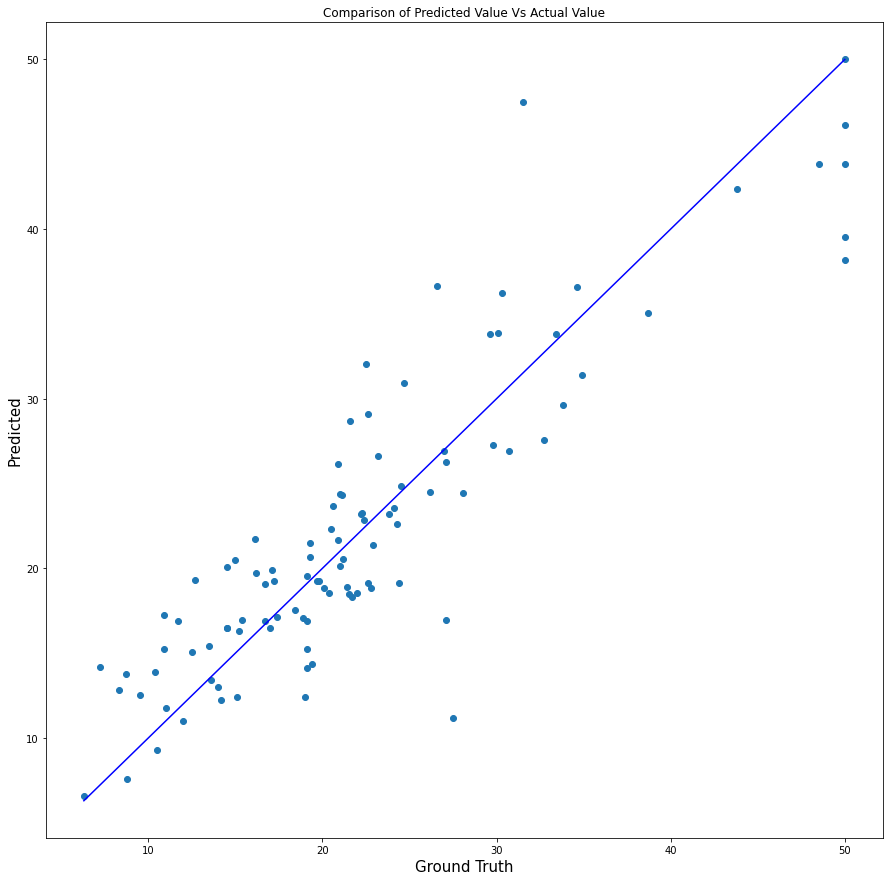

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred)
p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparison of Predicted Value Vs Actual Value")
plt.xlabel('Ground Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()

## Mencoba menggunakan normalization

In [ ]:
normal = MinMaxScaler()
X_final_normal = normal.fit_transform(X_final)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final_normal, y_final, test_size = 0.2, random_state = 100)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

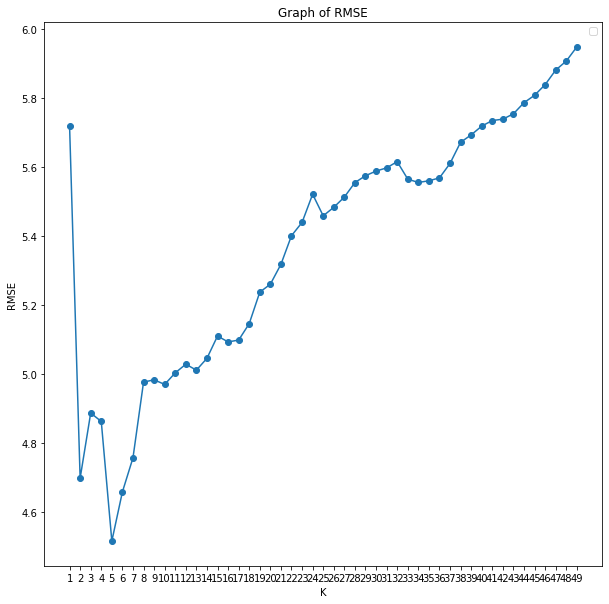

In [ ]:
rmse_values = []
k_num = []
for k in range(1, 50):
  model = KNNRegressionEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 1.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Terlihat bahwa ketika normalisasi data digunakan dalam data preparation, hal ini menghasilkan elbow curve yang mencapai mininum yang lebih rendah. Terlihat bahwa elbow curve ini mencapai minimum pada saat k = 5, di mana k = 5 menghasilkan RMSE yang paling rendah, yang menunjukkan bahwa k = 5 merupakan nilai k yang paling optimal untuk digunakan untuk regresi untuk dataset ini. Maka, saya akan menggunakan k = 5.

In [ ]:
model = KNNRegressionEuclidian(5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(60)

,Predicted,Ground Truth
0,38.90,34.6
1,41.96,31.5
2,19.58,20.6
3,19.80,14.5
4,20.82,16.2
5,22.12,22.3
6,22.88,22.8
7,20.16,24.4
8,19.72,19.8
9,18.30,16.7


In [ ]:
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

20.398372549019605
4.516455750809434
0.7888243281441336


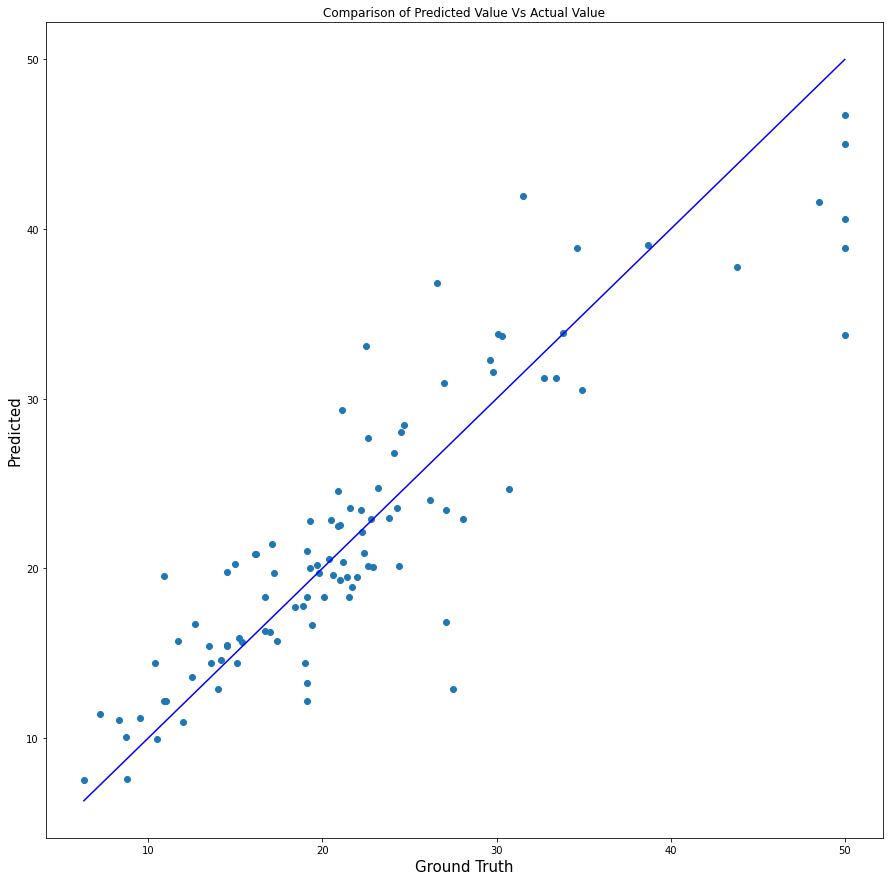

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred)
p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparison of Predicted Value Vs Actual Value")
plt.xlabel('Ground Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()

Saya bereksperimentasi dengan data preparation untuk KNN yang diaplikasikan kepada kasus regression, yaitu menggunakan dataset Boston House Pricing. Saya menghapuskan feature-feature yang kurang berkorelasi dengan dependent variable ataupun berkorelasi tinggi antar independent variable, sehingga hanya tersisi LSTAT dan PRATIO. Setelah itu, saya mencoba melakukan training dan predicting menggunakan model regresi KNN dengan tiga data berbeda, yaitu data mentahnya yang sudah dilakukan feature extraction, data yang distandardisasi, dan data yang dinormalisasi. Terlihat bahwa secara keseluruhan, ketiga data menghasilkan elbow curve yang mirip. Root Mean Square Error dengan pesat menurun pada k value yang rendah, lalu semakin k meningkat, semakin tinggi pula RMSE nya. Akan tetapi, jika dibandingkan dengan lebih lanjut, terlihat bahwa standardisasi dan normalisasi data menghasilkan error yang lebih rendah. Hal ini dapat terjadi karena dalam standardisasi dan normalisasi, data diolah untuk menghilangkan bias yang terdapat oleh karena scale dari variable-variable yang berbeda yang dapat saja menyebabkan suatu variable lebih berbobot (karena memiliki nilai yang lebih tinggi). Untuk dataset ini secara spesifik, normalisasi memiliki dampak yang lebih tinggi dibandingkan standardisasi, dan hal ini terlihat melalui evaluation metrics, yaitu MSE, RMSE, dan R2. Untuk ketiga metric tersebut, data yang dinormalisasi menghasilkan values yang paling bagus. Secara keseluruhan, KNN mampu digunakan untuk memprediksikan value-value numerik melalui regresi dengan cukup bagus, selama data preparation dilakukan dengan baik untuk mencari features yang paling bagus, dan bentuk data yang paling bagus.